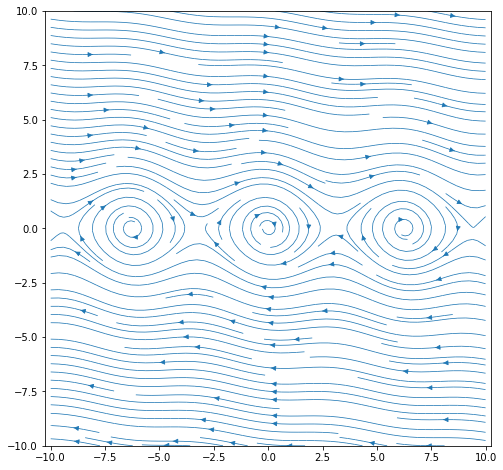

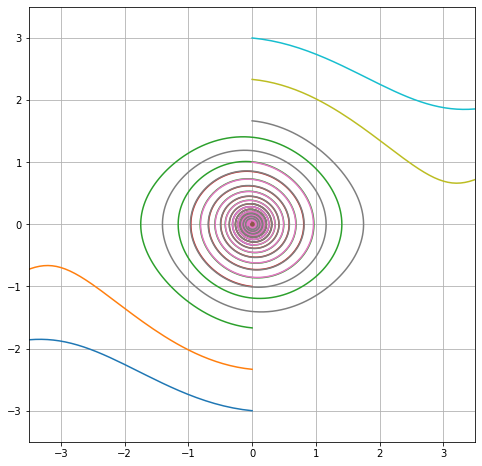

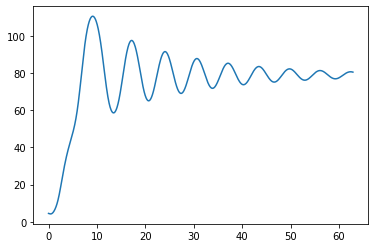

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def pendulum(t, y, data):
	zeta, omega = data
	#dydt = np.array([y[1], -omega**2*y[0] - 2.*zeta*omega*y[1]])
	dydt = np.array([y[1], -omega**2*np.sin(y[0]) - 2.*zeta*omega*y[1]])
	return dydt

def ode_solve(F, t_ini, t_end, y0, y1, h=0.1, method="EulerExplicit", data=(0.,1.)):
    t = np.arange(t_ini, t_end + h, h)
    y = np.zeros([2, len(t)])
    zeta, omega = data
    y[:,0] = np.array([y1, y0])

    if method == ("EulerExplicit"):
        for i in range(0, len(t) - 1):
            y[:, i+1] = y[:, i] + h*pendulum(t[i], y[:, i], data)
    elif method == ("EulerImplicit"):

        def FImplicit(y, *param):
            # *param
            #It allows for a varying number of arguments.
            #The function signature stays concise while the unpacking happens inside the function.
            yi, t, h, F = param
            return y - yi - h*F(t+h, y, data)

        for i in range(0, len(t) - 1):
            #FImplicit = y[:, i + 1] - y[:, i] - h*pendulum(t[i] + h, y[:, i+1], data)
            param = (y[:, i], t[i], h, F)
            y[:, i + 1] = fsolve(FImplicit, [0, 0], args=param)

    elif method == ("RK2"):
        for i in range(0, len(t) - 1):
            k1 = h*F(t[i], y[:, i], data)
            k2 = h*F(t[i] + h, y[:, i] + k1, data)
            y[:, i+1] = y[:, i] + (1/2)*(k1 +k2)
    elif method == ("RK4"):
        for i in range(0, len(t) - 1):
            k1 = F(t[i], y[:, i], data)
            k2 = F(t[i]+ h/2, y[:, i] + k1*h/2, data)
            k3 = F(t[i]+ h/2, y[:, i] + k2*h/2, data)
            k4 = F(t[i] + h, y[:, i] + k3*h, data)
            y[:, i+1] = y[:, i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    else:
        raise Exception("Method not implemented yet !")
    return t,y

h = 0.05
y0 = np.linspace(-3, 3, 10)
y1 = 0.
t0 = 0.
tend = 20*np.pi
zeta=0.05
omega=1

x = np.linspace(-10., 10., 200)
y = np.linspace(-10., 10., 200)
xx, yy = np.meshgrid(x,y)
dy = -omega**2*np.sin(xx) - 2.*zeta*omega*yy
#dy = -omega**2*xx
dx = yy
plt.figure(figsize = (8, 8))
plt.streamplot(xx, yy, dx, dy, density=1.8, linewidth=0.75)
plt.axis("equal")

plt.figure(figsize = (8, 8))
for i in range(len(y0)):
	t, sol = ode_solve(pendulum, t0, tend, y0[i], 0., h=0.05, method="RK4", data=(zeta, omega))
	# RK4, RK2, EulerImplicit
	plt.plot(sol[0, :], sol[1, :])
	#plt.plot(t, sol[0, :])
plt.grid()
#plt.axis("equal")
plt.ylim([-3.5, 3.5])
plt.xlim([-3.5, 3.5])

E = 0.5*(sol[1, :]**2 + omega**2*sol[0, :]**2)
plt.figure()
plt.plot(t, E)#t, 0.2*0.2*0.5*omega**2*np.ones(len(t)))
